In [1]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-19 16:34:11--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  87.1MB/s    in 0.9s    

2022-10-19 16:34:12 (87.1 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.

In [2]:
!conda --version

conda 4.8.2


In [3]:
!conda config --prepend channels conda-forge

In [ ]:
# !conda create -n ox --strict-channel-priority osmnx

In [4]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.1 MB/s 


In [5]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.9 MB/s 
     |████████████████████████████████| 2.0 MB 34.1 MB/s 
     |████████████████████████████████| 11.2 MB 47.7 MB/s 
     |████████████████████████████████| 1.0 MB 54.3 MB/s 
     |████████████████████████████████| 11.3 MB 37.0 MB/s 
     |████████████████████████████████| 6.3 MB 45.3 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 1.0 MB 43.0 MB/s 
     |████████████████████████████████| 15.7 MB 2.1 MB/s 
     |████████████████████████████████| 40 kB 4.7 MB/s 
     |████████████████████████████████| 960 kB 53.1 MB/s 
     |████████████████████████████████| 1.1 MB 53.9 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 3.1 MB 39.0 MB/s 
     |████████████████████████████████| 247 kB 51.9 MB/s 
     |███████████████████████████████

In [31]:
import osmnx as ox
import networkx as nx 
import plotly.graph_objects as go
import numpy as np
import pandas as pd

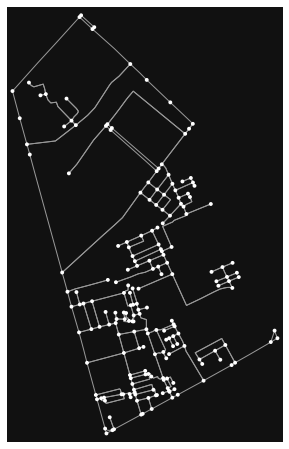

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f062716a8d0>)

In [7]:
G =  ox.graph_from_place('Ward 14, District 10, Ho Chi Minh City, 70000, Vietnam', network_type='drive', simplify=True)
ox.plot_graph(G)

In [8]:
print("node count:", len(G.nodes()))
print("edge count:", len(G.edges()))

node count: 196
edge count: 431


In [39]:
node_id_list = list(G.nodes)

edge_info_dict = {}

for edge in G.out_edges(data=True):
    edge_attributes = edge[2]
    # remove geometry object from output
    edge_attributes_wo_geometry = {i:edge_attributes[i] for i in edge_attributes if i!='geometry'}
    edge_info_dict[edge[:2]] = edge_attributes_wo_geometry

# distance dataframe is graph matrix
distance_df = pd.DataFrame(columns=node_id_list, index=node_id_list)

for node_row in node_id_list:
    for node_col in node_id_list:
        edge = (node_row, node_col)
        if edge in edge_info_dict:
            distance = edge_info_dict[edge]['length']
            is_oneway = edge_info_dict[edge]['oneway']
            # print(distance)
            distance_df.at[node_row, node_col] = distance
        else:
            distance_df.at[node_row, node_col] = 0

distance_df.head(50)

,366377622,366379729,366387767,366388518,366392290,366397569,366418499,366452341,366460957,366464409,...,9602196642,9604650525,9604650526,9725835816,9725876819,9725876820,9725876821,9822126056,9822126057,10001996470
366377622,0,0,0,0,0,39.872,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366379729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366387767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366388518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366392290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366397569,39.872,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366418499,0,0,0,0,0,0,0,0,165.123,0,...,0,0,0,0,0,0,0,0,0,0
366452341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366460957,0,0,0,0,0,0,165.123,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366464409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# implement K shortest path return route (a list of node)
def k_shortest_path() -> list:
  pass

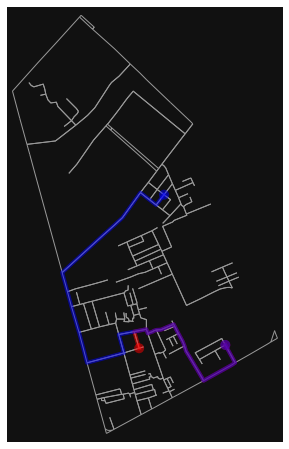

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f062371f610>)

In [18]:
# route is list node id
route = [2841279012, 4629359733, 2841264942, 2433653225, 9604650525, 5073776282, 5073776310, 5073776312, 5073776290, 5073776307, 366392290, 2999044477, 5047258230]
route2 = [2841279012, 4629359733, 2841264942, 2433653225, 9604650525, 5073776282, 5073776310, 5073776312, 5073776290, 5073776307, 366392290, 2999044477, 2999044478, 2302073744, 4661273983, 4628119689, 2302073721, 5073779404, 2302073725, 3088844994, 5073779389, 3088844995, 4662998248]
rc = ['r', 'b']
ox.plot_graph_routes(G, [route, route2], route_colors=rc, node_size=0)